<a href="https://colab.research.google.com/github/luismmachados/Briefcase_project/blob/main/Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.


# Regresor model

## Import Libraries

In [1]:
from pandas import (read_csv,
                    DataFrame,
                    concat,
                    get_dummies,
)

In [2]:
from numpy import (bincount,
                   sqrt,
                   logspace,
                   argmax,
                   arange,
)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from seaborn import (heatmap,
                    scatterplot,
                    kdeplot,
                    displot,
                    set_style,
                    lineplot,
                    boxplot,
                    pairplot,
                    catplot,
)

In [5]:
from sklearn.linear_model import (LinearRegression,
                                  Lasso,
                                  LassoCV,
                                  RidgeCV,
                                  Ridge,
                                  LogisticRegression,
)
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             mean_squared_error,
                             r2_score,
                             roc_auc_score,
                             roc_curve,
                             classification_report,
)
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   RobustScaler,
                                   MinMaxScaler,
)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

In [6]:
import joblib

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Configuración
import warnings
warnings.filterwarnings('ignore')

## Load data

In [9]:
# Definimos nuestra variable con el Dataframe a trabajar, con el nombre df_1
df = read_csv("/content/drive/MyDrive/Colab Notebooks/proyectos/rrhh.csv")
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


Ya con nuestro dataset en el drive, podremos cargarlo y definirlo como *df*, y observamos como se ve.

## EDA

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
None


Acá podemos observar la información del dataset, desde el total de muestras hasta el tipo de dato.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Experiencia,1000.0,6.4162,2.577612,0.1,4.6,6.4,8.1,15.2
Hijos,1000.0,1.4530,1.208823,0.0,0.0,1.0,2.0,4.0
Casado,1000.0,0.5950,0.491138,0.0,0.0,1.0,1.0,1.0
Salario,1000.0,30787.0600,11520.200049,5630.0,22557.5,29470.0,37922.5,83470.0


Acá observamos las estadisticas descriptivas del dataset, el feature de *Salario* nos indica su dispersión de manera significativa, reflejando una variabilidad considerable entre los salarios de los empleados. Se puede apreciar entre la diferencia de salarios entre el cuartil 25% y el 75%.

In [12]:
df.isna().sum()

Experiencia    0
Posicion       0
Hijos          0
Casado         0
Educacion      0
Salario        0
dtype: int64

El dataset cuenta con toda su completitud

In [13]:
df.duplicated().sum()

0

No contiene valores duplicados.

## Univariate analysis

In [14]:
df.columns

Index(['Experiencia', 'Posicion', 'Hijos', 'Casado', 'Educacion', 'Salario'], dtype='object')

### *Experiencia* column

In [15]:
df['Experiencia'].unique()

array([ 0.5,  5.6, 11.7,  5.2,  7.2,  1.3,  8.1,  6.2,  9.8, 10.5,  6.4,
        3.7,  8. ,  9. ,  1.7, 12.2,  7. ,  5.9,  1.6,  9.7,  5. ,  6.6,
        9.6,  7.8, 11.9,  6.3,  4.5,  4.9,  8.4,  8.8,  9.1,  7.5,  5.8,
        9.3,  5.5,  3.9,  6.9,  2.2,  4.2,  9.9,  5.4, 10.1,  0.9,  9.2,
        8.2,  8.5,  7.4,  6.1,  7.7,  2.8,  3.2,  5.3,  0.8, 11.5,  3. ,
        7.1,  2.1,  7.6,  8.6,  6.5, 10.9,  4.8,  4.3, 13. , 10.2,  6.8,
        5.7,  4.4,  7.9, 10.6,  8.7,  3.1,  8.3,  4.6,  6. , 10.8,  2.4,
       15.2,  2.6,  1.4,  4.1,  3.3,  2. ,  3.5,  0.6,  6.7,  4.7,  1. ,
        7.3,  8.9,  9.5,  1.2, 12.9,  5.1,  3.8, 10.4,  3.6, 13.5, 10.7,
        9.4, 11.3, 11.1,  2.5,  0.7, 11.8,  2.7,  3.4,  1.8, 10. ,  4. ,
       12.5, 11.4,  0.1, 14.4, 14.3, 11.6,  1.9, 12.4, 12.3, 10.3,  2.9,
       14.8,  1.1, 11.2, 14.1, 13.7, 12.1])

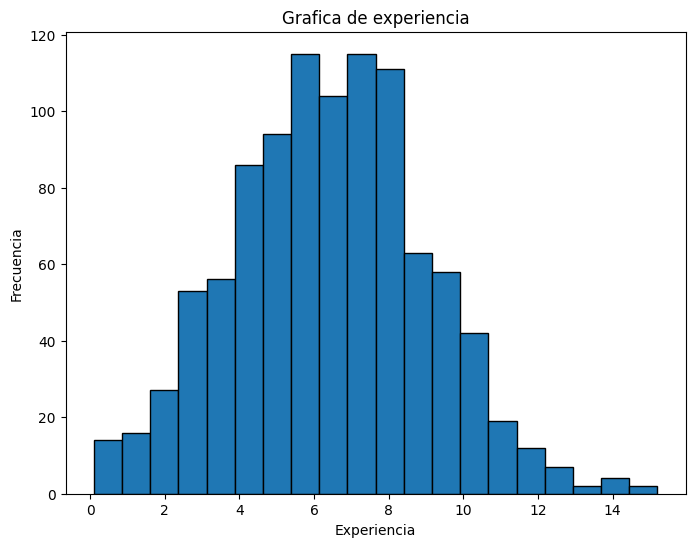

In [16]:
plt.figure(figsize=(8,6))

plt.hist(df['Experiencia'], bins=20, edgecolor='black')
plt.xlabel('Experiencia')
plt.ylabel('Frecuencia')
plt.title('Grafica de experiencia')
plt.show()

Cuando una gráfica tiene forma de campana, como esta, se le llama distribución normal o distribución gaussiana, entre los 4 - 8.5 se encuentra la mayor concentración de la experiencia de los usuarios

### *Posición* column

In [17]:
df['Posicion'].unique()

array(['Analista', 'Coordinador', 'Gerente'], dtype=object)

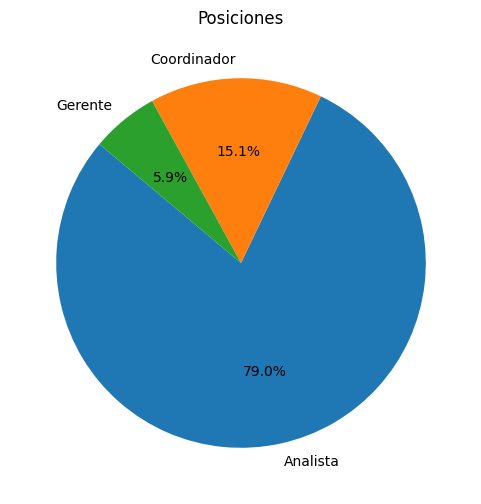

In [18]:
plt.figure(figsize=(6,6))
df['Posicion'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Posiciones')
plt.ylabel('')
plt.show()

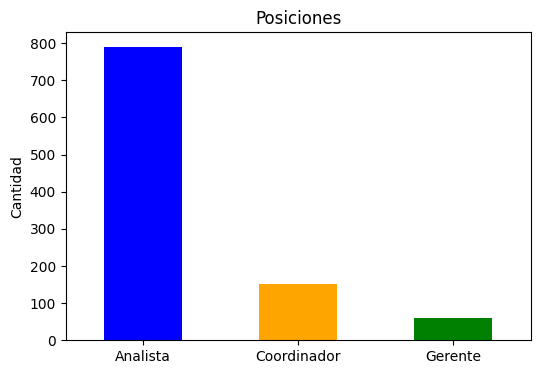

In [19]:
plt.figure(figsize=(6,4))
df['Posicion'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel('')
plt.ylabel('Cantidad')
plt.title('Posiciones')
plt.xticks(rotation=0)
plt.show()

Con estas graficas podemos ver los cargos y lo que representa  en su totalidad, en su mayoria son *analistas* por otra parte la minoria de parte de los *gerentes*

### *Hijos* column

In [20]:
df['Hijos'].nunique()

5

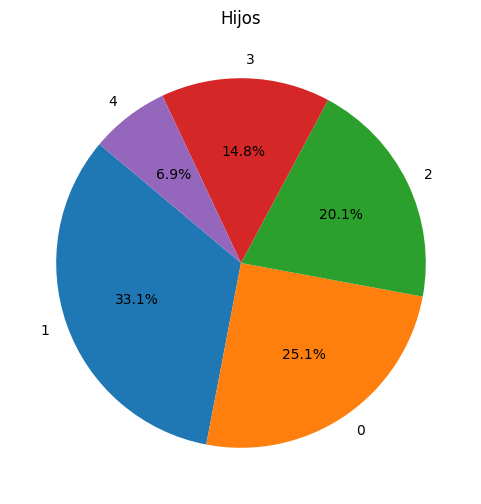

In [21]:
plt.figure(figsize=(6,6))
df['Hijos'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Hijos')
plt.ylabel('')
plt.show()

Con casi el 60% de los usuarios cuentan con *0 o 1 hijo,* luego son cada vez menos las personas que cuentan con mayor cantidad de hijos.

### *Casado* column

In [22]:
df['Casado'].nunique()

2

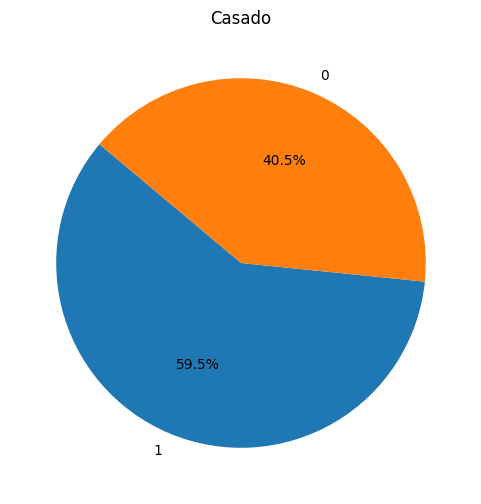

In [23]:
plt.figure(figsize=(6,6))
df['Casado'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Casado')
plt.ylabel('')
plt.show()

Casi se aprecia un equilibrio entre las personas *casadas* o los que no lo estan, siendo las personas *casadas* la mayoria con casi un 60%

### *Educacion* column

In [24]:
df['Educacion'].nunique()

3

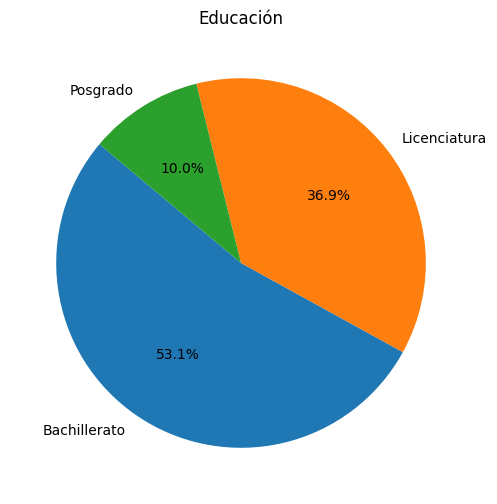

In [25]:
plt.figure(figsize=(6,6))
df['Educacion'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Educación')
plt.ylabel('')
plt.show()

En su mayoria solo cuentan con la educación de *bachillerato*, tiene relación com aquellos usuarios que cuentan con el cargo mas bajo de *analista*, donde tambien un pequeño porcentaje de *licenciados* son *analistas, ya que del 10% de los usuarios con *posgrado* solo el 6% son *gerentes*

### *Salario* column

In [26]:
df['Salario'].describe()

count     1000.000000
mean     30787.060000
std      11520.200049
min       5630.000000
25%      22557.500000
50%      29470.000000
75%      37922.500000
max      83470.000000
Name: Salario, dtype: float64

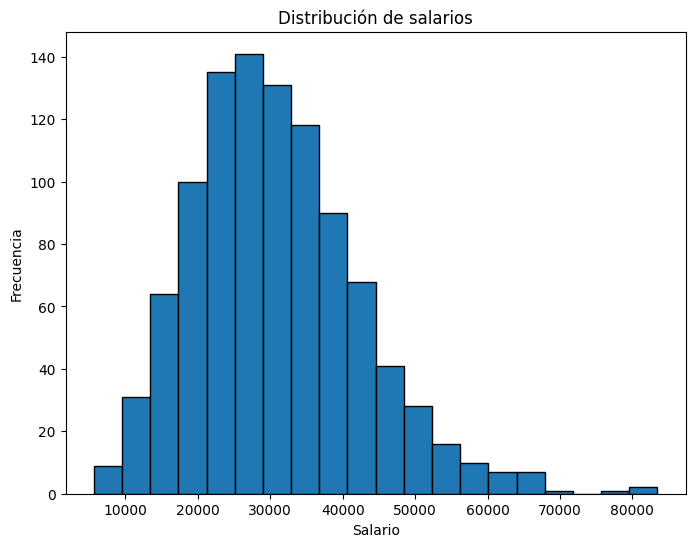

In [27]:
plt.figure(figsize=(8,6))

plt.hist(df['Salario'], bins=20, edgecolor='black')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Distribución de salarios')
plt.show()

Podemos observar la forma de una campana en esta grafica, una distribución normal; La mayor concentración de personas se encuentran entre 25.000$ - 35.000$

## Label encoder

In [28]:
le = LabelEncoder()

for col in df.columns:                         # Iteramos entre las columnas object y aplicamos entre ellas
    if df[col].dtype == 'object':
        le.fit_transform(list(df[col].values))
        df[col] = le.transform(df[col].values)

Para poder llevar a cabo un analisis bivariado o multivariado los features deben ser numericos, por eso con *label encoder*,  transformaremos aquellos features los cuales cuentan con valores categoricos

## Bivariate Analysis

In [29]:
df.columns

Index(['Experiencia', 'Posicion', 'Hijos', 'Casado', 'Educacion', 'Salario'], dtype='object')

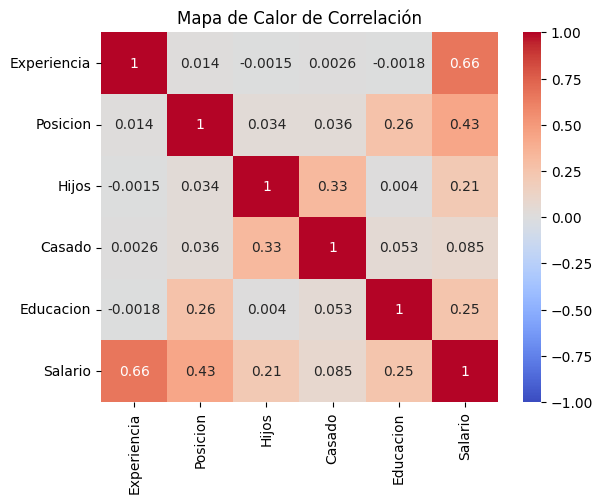

In [30]:
corr = df.corr()
heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

Antes de los análisis multivariados es necesario obtener la relación de las variables entre si, con este mapa de calor de correlación lo podemos obsevar, por ejemplo siendo *Salario* el features con mayor correlación entre las variables, usaremos esta gráfica para desarrollar los siguientes análisis

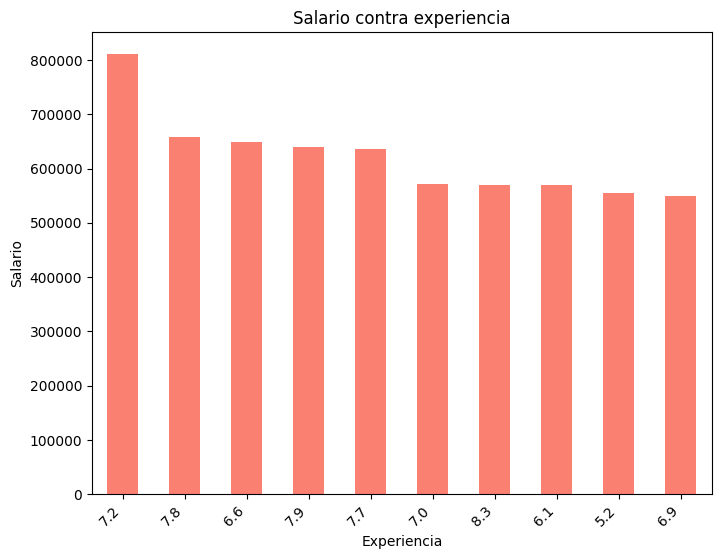

In [31]:
exp_sal  = df.groupby('Experiencia')['Salario'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
exp_sal.plot(kind='bar', color='salmon')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.title('Salario contra experiencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

Esta gráfica nos indica como se comporta el *Salario* con respecto a la *Experiencia*, vemos una tendencia la cual mientras más *experiencia* mas *salario*, podriamos pensar que la mayor de las *experiencias* tendrian el mayor de los *salarios* pero en este caso no es así

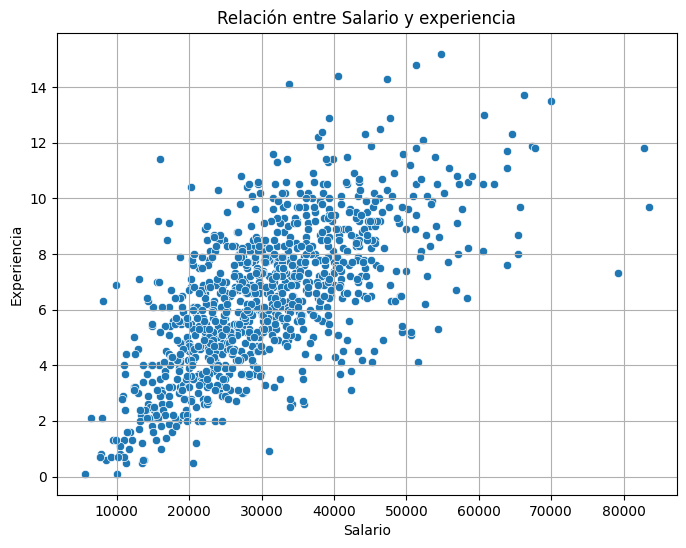

In [32]:
plt.figure(figsize=(8, 6))
scatterplot(data=df, x='Salario', y='Experiencia', marker='o')

# Añadir títulos y etiquetas
plt.title('Relación entre Salario y experiencia')
plt.xlabel('Salario')
plt.ylabel('Experiencia')
plt.grid(True)


Con esta gráfica de dispersión nos deja ver con mas claridad el comportamiento de ambos features, se logra apreciar que los *salarios* mas altos no corresponde a los usuarios con mayor *experiencia*, como se dijo anteriormente

- `Leyenda de posiciones`:

  - 0: `Analista`
  - 1: `Coordinador`
  - 2: `Gerente`

- `Leyenda de educacion`
  - 0: `Bachillerato`
  - 1: `Licenciatura`
  - 2: `Posgrado`

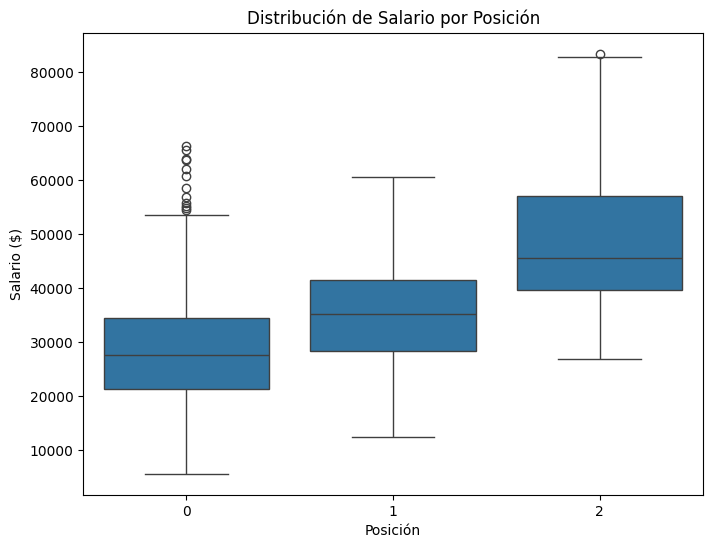

In [33]:
plt.figure(figsize=(8, 6))
boxplot(x='Posicion', y='Salario', data=df)
plt.title('Distribución de Salario por Posición')
plt.xlabel('Posición')
plt.ylabel('Salario ($)')
plt.show()

Las gráficas de cajas son muy utiles, podemos ver las *Posiciones* de los usuarios con respecto al *Salario*, en la primera *posición* que seria de *analista* se observan valores atípicos que representan *salarios* mas altos de lo "normal", del resto se comportan de forma "normal", siendo la posición de *gerente* con mayor alcance salarial

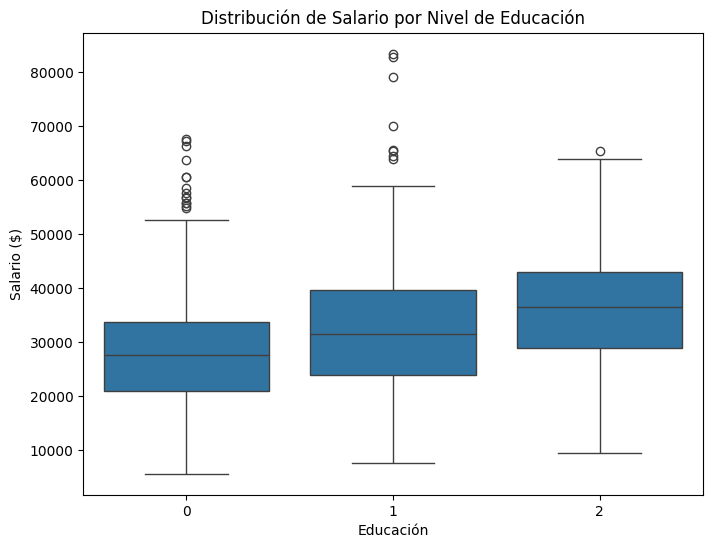

In [34]:
plt.figure(figsize=(8, 6))
boxplot(x='Educacion', y='Salario', data=df)
plt.title('Distribución de Salario por Nivel de Educación')
plt.xlabel('Educación')
plt.ylabel('Salario ($)')
plt.show()


Acá observamos mas cantidad de valores atípicos entre los features de *Salario* y *Educación*, por parte de la *licenciatura* se observan los *Salarios* mas altos, nos indica que hay usuarios los cuales cuentan con la *posición* con mayor alcance salarial, sin contar con la mayor *Educación*

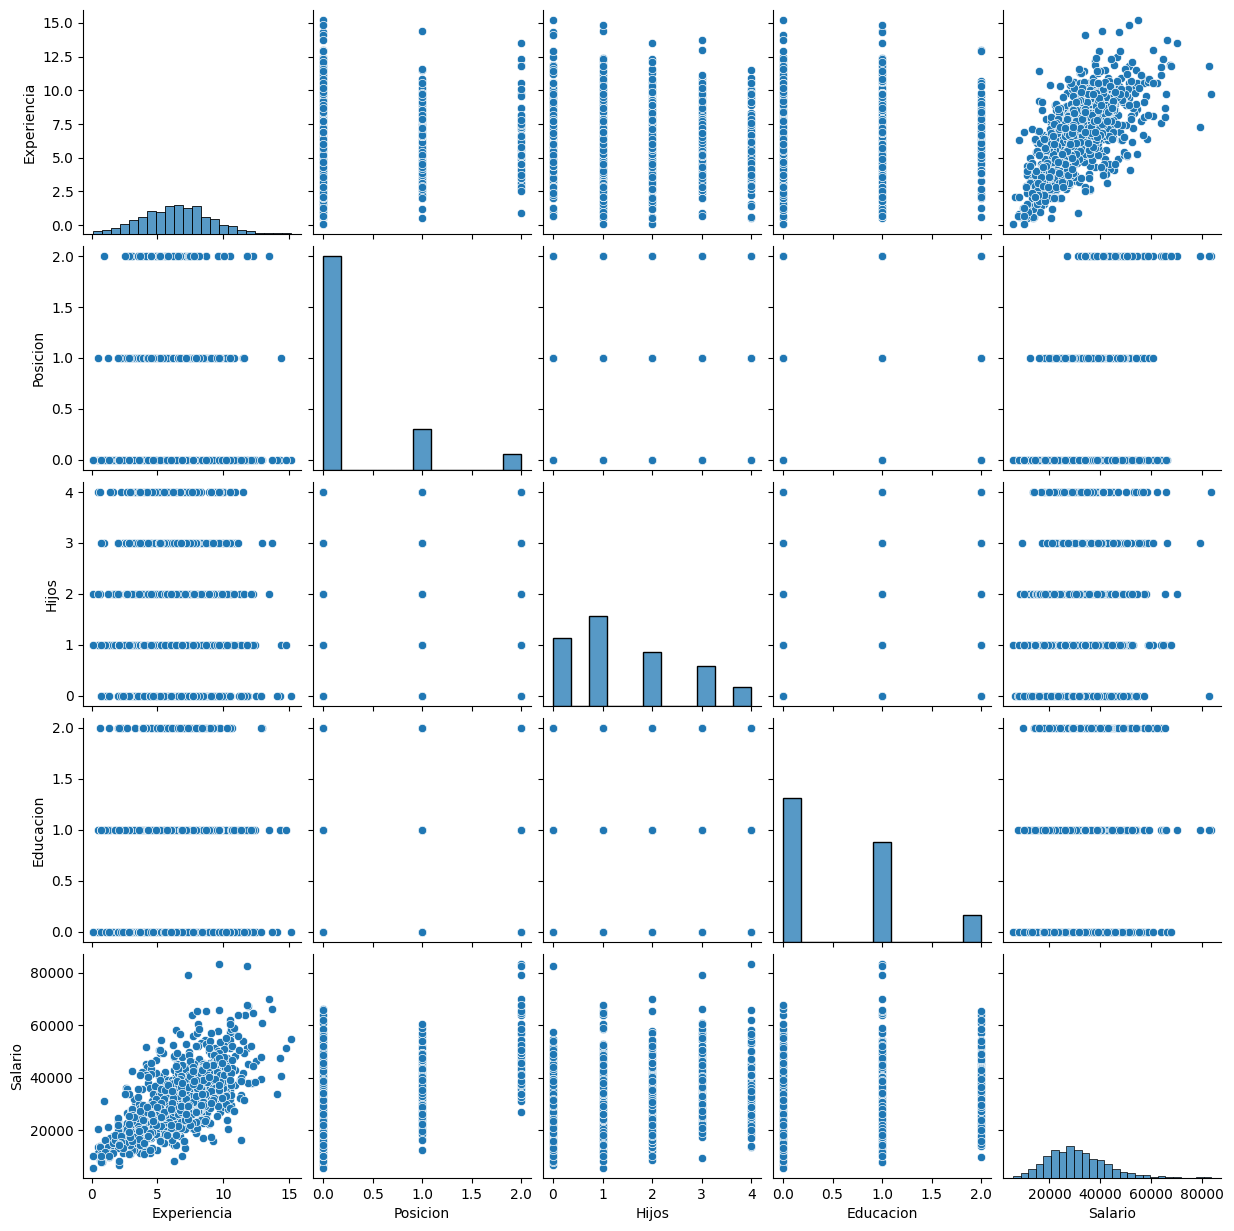

In [35]:
pairplot(df[['Experiencia', 'Posicion', 'Hijos', 'Educacion', 'Salario']])
plt.show()

Podemos observar una gráfica mas general la cual involucra todos los features, nos devuelve parte de lo que ya he mostrado y otras mas, por ejemplo, como la cantidad de hijos dependiendo del salario, por ejemplo el usuario con 4 hijos cuenta con el mayor *Salario* seguido de un usuario sin hijos.

## Train test data

In [36]:
X = df.drop(columns='Salario')
y = df['Salario']
X_train, X_test, y_train, y_test = train_test_split(X,                # Ajustes de hiperparametros
                                                    y,
                                                    test_size=0.15,
                                                    random_state=760
)

Acá definimos las variables dependientes e independientes, posteriormente definimos los conjuntos de entrenamiento y de prueba para nuestro modelo de predicción

## Data engineering

In [37]:
column = 'Experiencia', 'Hijos'          # Definimos los features a transformar

column_transfor = ColumnTransformer(
    transformers=[
        ('escalar', StandardScaler(), column) # Elección del scaler
    ],
    remainder='passthrough'
)

# Crear el pipeline con el transformer
pipeline = Pipeline(steps=[
    ('preprocesamiento', column_transfor)
])

# Aplicar el pipeline al conjunto de entrenamiento y prueba
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Antes del entrenamiento es necesario aplicar un pre-procesamiento o ingeneria de datos para el correcto entrenamiento de dicho modelo, aplicaremos un pipeline sencillo, primeramente especificamos los features que procesaremos, luego instanciamos el metodo de escalamiento, y se lo aplicamos a los conjuntos de entrenamiento

## Train model

In [38]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

Definimos nuestro modelo de predicción, en este caso de *Regresión lineal*, y entrenamos con los conjuntos de entrenamiento

## Prediction and performance

In [39]:
y_pred = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')


Error Cuadrático Medio (MSE): 31026013.02687542
Coeficiente de Determinación (R^2): 0.7865906308771698


Definimos una variable de predicción, y le aplicamos un par de metricas de desempeño, el *error cuadratico medio* y el *coeficiente de determinación* nos arroja un 78% del r2, un valor cercano a 1 indica una fuerte variabilidad con respecto a la variable dependiente, en pocas palabras se ajusta mejor a los datos, en este caso contamos con un 78% lo que nos indica buen desempeño del modelo.

In [40]:
df_pred = DataFrame({'Real': y_test,
                     'Predicción': y_pred})
df_pred.head(10)

,Real,Predicción
995,21820,27051.087501
404,54010,56677.752709
651,19360,16087.078140
32,31140,30370.764973
609,35900,36380.155317
567,36800,31557.904712
694,43500,41003.128612
545,65350,53607.832321
878,32160,27543.525786
775,17770,17111.433285


Acá creamos un Dataframe para mostrar una comparación de los valores predichos por nuestro modelo contra los valores reales, como podemos ver un pequeño margen de falla.

## Save the model

In [41]:
# Guardar el modelo
joblib.dump(model_lr, 'modelo_regresion_lineal.pkl')

['modelo_regresion_lineal.pkl']

Ya con nuestro modelo entrenado y probado, podremos guardarlo para luego desplegar

# Logistic model

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.



## Load Data

In [42]:
df_1 = read_csv("/content/drive/MyDrive/Colab Notebooks/proyectos/rrhh_2.csv")
df_1.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


Definimos este otro dataset como *df_1*

## EDA

In [43]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
 6   Contratado   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


Acá podemos observar el total de las columnas, el tipo de dato de cada una y el total de valores de la misma

In [44]:
df_1.describe()

,Experiencia,Hijos,Casado,Salario,Contratado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,30787.060000,0.518000
std,2.577612,1.208823,0.491138,11520.200049,0.499926
min,0.100000,0.000000,0.000000,5630.000000,0.000000
25%,4.600000,0.000000,0.000000,22557.500000,0.000000
50%,6.400000,1.000000,1.000000,29470.000000,1.000000
75%,8.100000,2.000000,1.000000,37922.500000,1.000000
max,15.200000,4.000000,1.000000,83470.000000,1.000000


Observamos las estadisticas descriptivas de este dataset

In [45]:
df_1.isna().sum() / len(df_1) * 100

Experiencia    0.0
Posicion       0.0
Hijos          0.0
Casado         0.0
Educacion      0.0
Salario        0.0
Contratado     0.0
dtype: float64

Podemos ver la sumatoria de los valores nulos por columna, en este caso no las hay

In [46]:
df_1.duplicated().sum()

0

Tampoco exiten valores duplicados en nuestro Dataset

## Label encoder

In [47]:
le = LabelEncoder()

for col in df_1.columns:
    if df_1[col].dtype == 'object':
        le.fit_transform(list(df_1[col].values))
        df_1[col] = le.transform(df_1[col].values)

Aplicaremos la misma tecnica anterior para convertir los features *object* a numericos, ya que son los mismos

## Bivariate Analysis

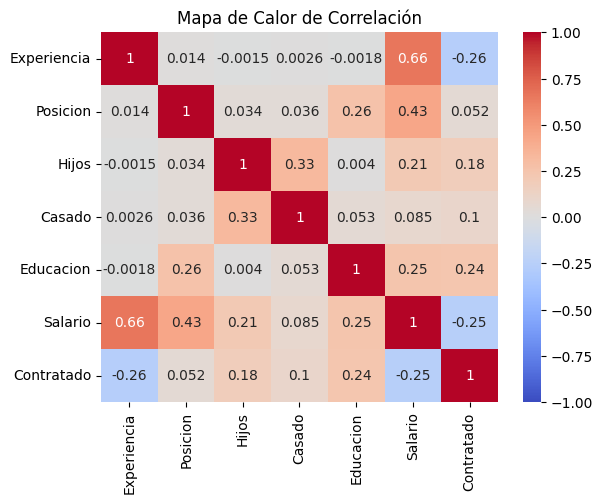

In [48]:
corr = df_1.corr()
heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

Acá podemos confirmar que el dataframe es el mismo, solo con un feature nuevo llamado *Contratado*, todas las otras relaciones se mantienen y este nuevo feature tiene un poco con *Educacion* y *Hijos*


- `Leyenda de educacion`
  - 0: `Bachillerato`
  - 1: `Licenciatura`
  - 2: `Posgrado`

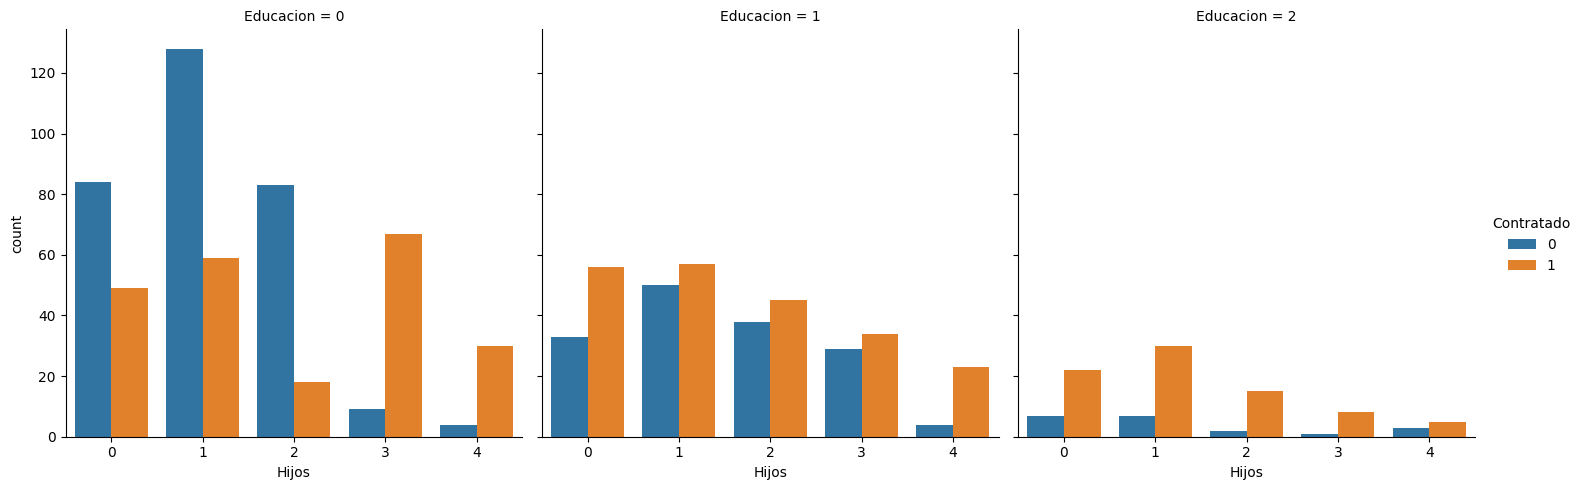

In [49]:
# Suponiendo que tus variables categóricas son 'Posicion', 'Casado' y 'Educacion'
catplot(data=df_1, x='Hijos', hue='Contratado', col='Educacion', kind='count')
plt.show()

Es interesante lo que podemos ver acá:
  - Mientras mayor *educación* es menos el desempleo
  - Los usarios con un solo hijo son los que mas coincidencias tienen
  - Los usuarios con licenciaturas son los mas equilibrados con respecto a los features analisados


No profundizare mas con el análisis entre variables ya que es el mismo que el anterior, ya conocemos las tendencias.

## Train test data

In [50]:
X = df_1.drop(columns='Contratado')
y = df_1['Contratado']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=34
)

Acá definimos las variables dependientes e independientes, posteriormente definimos los conjuntos de entrenamiento y de prueba para nuestro modelo de predicción

## Data engineering

In [51]:

columns_standard = ['Experiencia', 'Hijos']
columns_minmax = ['Salario']

# Crear el column transformer con diferentes scalers
column_transformer = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), columns_standard),
        ('minmax', MinMaxScaler(), columns_minmax)
    ],
    remainder='passthrough'
)

# Crear el pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer)
])

# Aplicar el pipeline al conjunto de entrenamiento y prueba
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

Aplicamos igual un pipeline para el pre-procesamiento, a diferencia del modelo anterior, toca escalar *Salario* como tiene valores totalmente diferentes los otros features, le aplicaremos un escalamiento que se adapte mejor a sus valores.

## Train model

In [52]:
model_lgr = LogisticRegression(penalty='l2', solver='liblinear')
model_lgr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Para este modelo de clasificación utilizaremos regresión logistica, modificamos un poco los hiperparametros para mejorar el desempeño.

## Prediction and performance

In [53]:
y_predlgr = model_lgr.predict(X_test)
Lgpre =  accuracy_score(y_test, y_predlgr)
print(f'Precisión Score: {Lgpre}')

Precisión Score: 0.8266666666666667


Definimos la variable predictora y tambien la variable con la matriz de confusión, a diferencia del modelo anterior, usaremos *accuaracy_score* como metrica de desempeño, arrojandonos un 82% de precisión, bastante bien

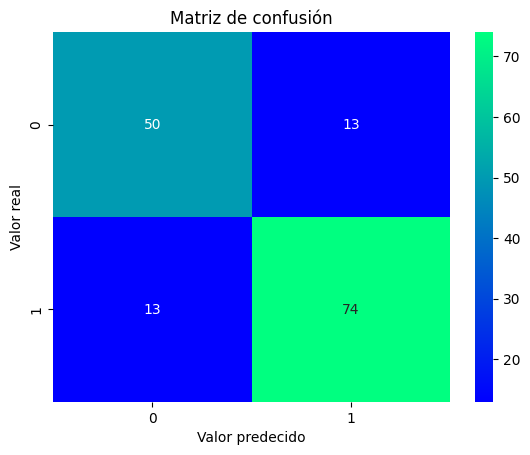

In [54]:
cm = confusion_matrix(y_test, y_predlgr)
heatmap(cm, annot= True, fmt= '.0f', cmap= 'winter')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

Con una matriz de confusión podemos observar las fallas y acertadas de los valores predichos con respecto a los reales, notamos que son muy pocos los valores incorrectos

## ROC curve

AUC-ROC: 0.8589673417259625


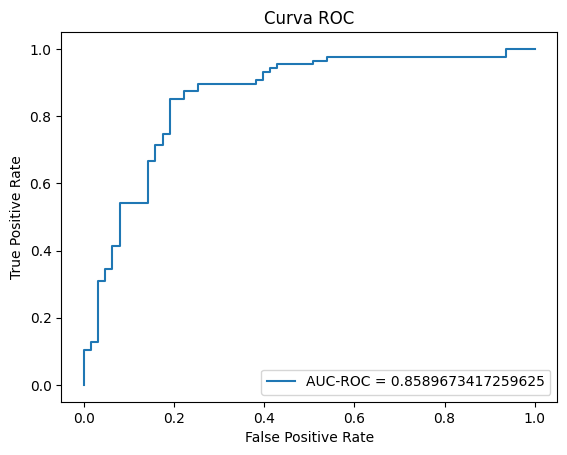

Umbral óptimo: 0.5017194374414228
Exactitud (Accuracy): 0.8333333333333334
Matriz de Confusión:
[[51 12]
 [13 74]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        63
           1       0.86      0.85      0.86        87

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [55]:
# Obtener probabilidades predichas en el conjunto de prueba
y_probs = model_lgr.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC para evaluar el rendimiento del modelo
roc_auc = roc_auc_score(y_test, y_probs)
print(f'AUC-ROC: {roc_auc}')

# Dibujar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC-ROC = {roc_auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Encontrar el umbral óptimo
optimal_threshold = thresholds[argmax(tpr - fpr)]
print(f'Umbral óptimo: {optimal_threshold}')

# Aplicar el umbral para convertir las probabilidades en etiquetas de clasificación
y_pred = (y_probs >= optimal_threshold).astype(int)

# Evaluar el rendimiento del modelo con el umbral óptimo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Exactitud (Accuracy): {accuracy}')
print('Matriz de Confusión:')
print(conf_matrix)
print('Reporte de Clasificación:')
print(classification_rep)



Usaremos como metrica la curva ROC perfecta para problemas de clasificación binaria, nos arroja un 85%, un valor cercano a 1 representa un modelo perfecto, mientras que un valor cercano a 0.5 indica un modelo que no es mejor que una predicción aleatoria.

## Save the model

In [56]:
# Guardar el modelo
joblib.dump(model_lgr, 'modelo_regresion_logistica.pkl')

['modelo_regresion_logistica.pkl']

Ya con nuestro modelo entrenado y probado, podremos guardarlo para luego desplegar

# Conclusion

Estuvo bastante entretenido el desarrollo de este pequeño proyecto, pudimos cumplir lo que el cliente necesitaba, el desarrollo de un modelo capaz de predecir el salario de un postulante con respecto a ciertos features, por ejemplo, la educación, la cantidad de hijos, si estaba casado o no, etc. Como desafio adicional, se nos anexo otro dataset pero con una columna mas, y en este caso se tenia que diseñar un modelo de clasificación, si un postulante dependiendo de tus features, seria contratado o no.